# Standardzation

* package를 쉽게 설치하기 위해 Anaconda 사용을 권장한다.

경기과학고등학교 관측천문학 강좌를 위해 만들었으며  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">크리에이티브 커먼즈 저작자표시-비영리-동일조건변경허락 4.0 국제 라이선스</a>에 따라 이용할 수 있음.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="크리에이티브 커먼즈 라이선스" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>


# Ground Based Observation


지상에서 관측하는 경우에 대기에 의한 영향이 많은 영향을 미치게 되는데 고려해야 할 중요한 두가지 문제는 

* Seeing
* Extinction (= scattering + absorption)

이다. 

instrumental magnitude (기기 등급)을 구한 후에 실제 등급을 구하는 과정을 우리는 standardization process (표준화 과정) 이라고 하는데, 이 과정에서 대기에 의한 영향을 고려해야 한다.


## 1. Seeing

Seeing은 망원경으로 별 등의 천체의 상을 보았을 때, 지구 대기의 흔들림이나 망원경 내부의 공기의 흔들림에 의해 상이 흐려지거나 불규칙하게 변동하는 것을 말한다. 보통 5단계에서 10단계에 걸쳐 등급을 매긴다. 별이 점상으로 정지해 있을 때를 가장 좋은상태 5 또는 10으로 하고, 별과 배경의 구별이 되지 않는 가장 나쁜 상태를 1로 기입한다. 

[meteoblue](https://www.meteoblue.com/en/weather/forecast/seeing/suwon_republic-of-korea_1835553)에서 seeing을 확인해 보자.

 중요한 문제 중의 하나이다. 그 의미를 파악해 보자. 

대기의 상태가 변하기 때문에 point source 인 별빛이 부드럽게 퍼지게 되는데, 이를 **point spread function** (점퍼짐 함수)로 나타낼 수 있고, 줄여서 **psf** 라고도 한다.

널리 알려진 점퍼짐 함수로 **psf** [Gaussian](https://en.wikipedia.org/wiki/Gaussian_function) 과 [Moffat](https://en.wikipedia.org/wiki/Moffat_distribution)이 있다. 

psfs의 매개 변수 중 천문학에서 널리 사용되는 것은 FWHM (full width at half-maximum) 이다. FWHM은 $ \frac {1} {2} f_{\rm max} $ 값을 갖는 두 점 사이의 거리로 정의되며, 두 psf와 FWHM 에 대해 알아보자.


### 1.1. Gauss

원형으로 대칭인 Gauss psf는 다음과 같다.

$ f_{\rm Gauss}(r) = A e^{ -(r-r_0)^2/2\sigma^2 } $

여기에서 $r$ 은 원의 중심인 $r_0$ 로부터의 거리이고,  $\sigma$는 표준편차이다. 

normalization constant $A$는 $A = \frac{1}{\sqrt{2 \pi \sigma^2}}$ 이고, 

적분하면 $ \int_{-\infty}^{+\infty} f_{\rm Gauss}(r) dr = 1$ 이다. 

FWHM을 구하기 위하여 $f_{\rm Gauss}(r_{1/2}) = \frac{A}{2}$ 를 구하면 $ (r_{1/2} - r_0)^2 = 2 \sigma^2 \log_e 2 $ 이므로 

$ {\rm FWHM} := 2(r_{1/2} - r_0) = 2 \sigma \sqrt{2 \log_e 2}  ~$ 이다.



### 1.2. Moffat

원형으로 대칭인 Moffat psf는 다음과 같다. 

$f_{\rm Moffat} (r) = A \left [ 1 + \left ( \frac{r-r_0}{R} \right )^2 \right ]^{-\beta} ~.$

여기에서 Gauss psf에서와 마찬가지로 $r$은 원의 중심인 $r_0$ 로 부터의 거리이다. 

normalization constant $A$ 는 $ A = \frac{\Gamma(\beta)}{R\sqrt{\pi} \Gamma(\beta-\frac{1}{2})} $ 이고, parameter $R$ 은 core width라 부르고, $\beta$는 power라고 한다. 

[astropy Moffat 2D](http://docs.astropy.org/en/stable/api/astropy.modeling.functional_models.Moffat2D.html#astropy.modeling.functional_models.Moffat2D)에서 `gamma`는 core width ($R$)과 `alpha`가 power ($\beta$)로 사용됨에 유의하자.

Gauss pdf에서 했던 바와 같이 FWHM을 $f_{\rm Moffat}(r_{1/2}) = \frac{A}{2}$ 를 구하면 

$ (r_{1/2} - r_0)^2 = R^2 (2^{1/\beta}-1) $

따라서, 

$ {\rm FWHM} := 2(r_{1/2} - r_0) = 2 R \sqrt{2^{1/\beta}-1} ~$ 이다. 

Moffat에 대해 더 궁금한 점은 [paper](http://adsabs.harvard.edu/cgi-bin/bib_query?bibcode=1969A%26A.....3..455M&db_key=AST) (Astronomy and Astrophysics, Vol. 3, p. 455 (1969)) 를 참고하자.


### 1.3. Comparison (Gauss VS Moffat)

균일한 대기 조건에서 노출시간을 길게 할 경우 psf는 대칭 모양으로 수렴되어 등치곡선이 동심원처럼 보여야 하지만 실제는 이와 다를 수 있다. 

어떤 경우에는 타원형으로 나타나고, 심지어 불규칙한 모양의 등치곡선이 나타날 수 도 있다. 

다음 예제에서는 1차원 단순 사례에서 Gaussian과 Moffat의 차이점을 보기 위해 Astropy를 사용하여 simulate 해 본 것이다. 

In [1]:
from astropy.modeling.functional_models import Moffat1D, Gaussian1D
from scipy.special import gamma as G
import numpy as np
from matplotlib import pyplot as plt

def norm_gauss(sigma):
    return 1/np.sqrt(2 * np.pi * sigma**2)

def norm_moffat(width, power):
    return G(power) / (width * np.sqrt(np.pi) * G(power - 1/2))

def HWHM_moffat(width, power):
    return width * np.sqrt( 2**(1/power) - 1)

x       = np.arange(0,10,0.1)
sigma   = np.array([1, 2])
width   = np.array([2, 5])
power   = np.array([1.5, 2.5])

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
for s in sigma:
    gauss  = Gaussian1D(amplitude=1, mean=0, stddev=s)    
    ax1.plot(x, norm_gauss(s)*gauss(x), ls=":", 
             label="sigma={0:.0f}, HWHM={1:.1f}".format(s, 2.355*s/2))
    ax2.plot(x, -2.5 * np.log10(norm_gauss(s)*gauss(x)), ls=":", 
             label="sigma={0:.0f}, HWHM={1:.1f}".format(s, 2.355*s/2))

for w in width:
    for p in power:
        moffat = Moffat1D(amplitude=1, x_0=0, gamma=w, alpha=p)
        HWHM   = HWHM_moffat(w, p)
        ax1.plot(x, norm_moffat(w, p) * moffat(x), lw=2,
                 label='w={0:.0f}, p={1:.1f}, HWHM={2:.1f}'.format(w, p, HWHM))
        ax2.plot(x, -2.5*np.log10(norm_moffat(w, p) * moffat(x)), lw=2,
                 label='width={0:.0f}, power={1:.1f}, HWHM={2:.1f}'.format(w, p, HWHM))

ax1.grid(ls=":")
ax2.grid(ls=":")
ax2.set_ylim(1, 5)
ax2.invert_yaxis()
ax2.set_title('log scale = magnitude scale')
plt.legend(bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

<Figure size 640x480 with 2 Axes>

Moffat은 그의 1969 년 논문에서 다음과 같이 기술하고 있다. 

> Two-dimensional intensity profiles of focal stellar images in photographic emulsions were derived by convolving gaussian seeing distributions with diffraction proffles and emulsion scattering functions. **The results predict too low an intensity for large radial distances from the centre of the image**, contradicting the assumption that seeing is gaussian.

위 그림에서 파란색 점선 (Gauss, FWHM 1.2)과 빨간색 실선 (Moffat, FWHM 1.1)을 비교 해 보면 함수의 종류 보다는 FWHM이 더 관련이 높음을 알 수 있다. 

psf normalize 하여 simulate 해 보면 별의 전체 플럭스는 일정하지만, psf는 대기 조건(seeing)에 따라 달라지는 것을 볼 수 있다. 

## 2. Extinction

대기의 **absorption** 와 **scattering** 때문에 flux는 감소하게 된다. instrument와 같은 노출시간으로 촬영하더라도 날씨의 영향으로 flux는 다르게 측정될 수 있다. 

더 복잡한 문제는 extinction이 파장의 함수이므로 필터마다 extinction factor를 적용해야 하는 것이다. 


### 2.1. Atmospheric Extinction

평평하고 균질한 대기를 가정할 때 flux는 $e^{-\tau}$의 factor에 의해 감소하는데, $\tau$ 는 광학적 두께이다. 

logarithmic scale 등급계에서 등급의 증가가 공기의 질량에 비례함을 의미한다.

$X = \sec(z)$일 때, $ m(X) = m_0 + k_X X $

여기에서 $m$ 은 관측된 등급, $m_0$ 은 대기가 없을 때의 등급이며, $k_X$ 는 *extinction coefficient* 라 부르는 상수이다. 


### 2.2. Wavelength Dependence

absorption와 scattering을 포함한 extinction은 파장에 의존한다. 

[Rayleigh scattering](https://en.wikipedia.org/wiki/Rayleigh_scattering) 즉, 입자의 크기를 나타내는 size parameter $x$ 보다 파장이 훨씬 길면 ($x \ll \lambda$) 소광은 $\lambda^{-4}$에 비례한다.

그래서 더 짧은 파장은 더 큰 $k_X$ 값을 가져야 하고, atmospheric extinction 이 더 많음을 의미한다.

> $k_X$ 는 파장에 의존적으로 ($k_{X, \lambda}$) 전형적으로 다음 값을 사용한다.
 * 0.4 in U-band
 * 0.2 in B-band
 * 0.1 in V-band

광대역 관측에서 "wavelength" 이라는 단어는 "filter"로 대체 될 수 있으며, V 밴드의 크기를 원하면 계수 $ a $와 $ k_ {XC} $를

$ m_V = m_{V, 0} + k_{X, V} X + a({\rm B}-{\rm V}) + k_{XC, V} X ({\rm B}-{\rm V}) ~$

로 부터 찾아야 한다.

B 대신 U, R, I 등의 다른 밴드를 사용할 수 있지만 B가 일반적이고, $ k_ {XC} $의 첨자 C는 color 를 의미한다. 

다행히도 $ a $는 매우 작고 ($ | a | \lesssim 0.1 $), 대부분의 경우 $ k _ {\ rm XC} $는 거의 0 이므로, B-V color 값이 일반적으로 1보다 작다는 것을 고려하면 color term 은 매우 무시할 수 있음을 알 수 있다. 

특히 $ k_ {XC} $의 도입은 많은 경우 불확실성을 증가 시키므로 하늘이 아주 명확하지 않으면 일반적으로 사용되지 않다.

> 색상 의존 조건 ($k_{XC, V}$ 와 $a$) 은 매우 정확한 결정이 필요한 경우가 아니면 별로 유용하지 않다.


## 3. Zero-point

우리가 coding이나 소프트웨어로부터 계산할 수있는 것은 $ m_{\rm inst} = 2.5 \log_{10} ( \rm ADU~ sec^{-1})$ 로 이를 **instrumental magnitude** 라고 한다. 이 등급은 optics, CCD, filter 등의 instrument의 특성에 의해 나타나는 것으로 실제와는 매우 다르다. 

$ \rm ADU $ 에 대한 normalization 은 0-mag 의 별을 사용하여 수학적으로 Pogson's fomula를 사용하여 수행 할 수 있다.

**zeropoint** magnitude를 $ m_z $로 표시한다면 실제 크기는 $ \Delta m = m_{\rm inst} - m_z $ 가 된다.


## 4. Standardization

### 4.1. Idea

zeropoint correction과 extinction correction을 수행하고, color terms를 무시하면 우리는 

$m_{0, V} = m_{{\rm inst}, V} - m_{z, V} - k_{X, V} X \quad( - {\rm color~correction~terms})~$ 

좀 더 친숙하게 $m_{0, V} $ 를 $ V $, $m_{{\rm inst}, V}$ 를 $v$ 등으로 바꾸면, 

$ v - V = z_{V} + k_{V} X \quad( + {\rm color~correction~terms})~ $

예를 들어, V-band에 대해서 일반적으로 사람들은 실제 등급을 소문자로 사용하고, 기기 등급을 대문자로 사용하며 *기기 등급을 실제 등급으로 변환하는 과정*을 **standardization** 이라고 한다.


### 4.2. Standardization in Practice

우리가 알고있는 것은 단지 $ X $이고 우리가 계산할 수있는 것은 $ m_{\rm inst} $인데, 어떻게 $ m_z $와 $ k_X $를 구할 수 있을까?

**standard stars**와 비교하는 방법이 있다. standard stars로 가장 널리 쓰이는 것이 **Landolt standard stars** 이다.

거의 동일한 sky condition 에서 standard stars를 촬영한 후 $ m_{\rm inst} - m_0 $ VS $ X $로 그래프를 그리면 기울기와 절편은 각각 $ k_X $와 $ m_z $ 이다. 이러한 가정은 extinction이 wavelength (or color)에 의존하는 것을 무시하고, 하늘 상태에 따라 달라지기 때문에 **원칙적으로 매일 밤** 수행해야 한다. 

가장 쉬운 경우는 측정 천체가 거의 동일한 천정 거리 (즉, 상수 $ X $) 인 경우이며, 이런 경우에는  $ k_X X $를 상수로 간주하고 $ m_z $의 일부로 설정하면 $ m_0 = m _ {\rm inst} - m_z '$가 된다. 



## Example 1: Calculating Instrumental Magnitude and Color

두 개의 천체와 세 개의 standard star 자료로 연습해 보자. 

각각의 standard star를 관측할 때 대기의 $X$ 값은 1.0, 1.3, 2.0 이라고 하고, V-band 와 B-band 의 exposure time은 'T_B'와 'T_V'이다.

photon counts는`count_V`와`count_B`이고, gain value 는 'gain = 1.0'이라고 하고 read out noise 는 무시하자. 또한 하늘 상태는 매우 좋았다고 가정하자. 

> **How can we calculate the magnitudes, colors, and their uncertainties?** 

instrumental magnitude 는 'b'와 'v', real magnitude'B', 'V'로 표현할 것이다. 

먼저 데이터를 load 하여 print 해 보자. 

In [2]:
from astropy.io.ascii import read
data = read('Standardization_data_0.dat')
print(type(data))
data.pprint

<class 'astropy.table.table.Table'>


<bound method Table.pprint of <Table length=11>
Target    X     T_V   T_B  count_V  count_B 
 str4  float64 int32 int32  int32    int32  
------ ------- ----- ----- -------- --------
  obj1     1.2    15    30  8695591 14211249
  obj2     1.4   200   400   180181   112201
  std1     1.0     5    10 12687301 22438244
  std2     1.0     5    10  5534312  7521077
  std3     1.0     5    10  2280320  1835230
  std1     1.3     7    12 14711983 25343232
  std2     1.3     7    12  6404748  8489650
  std3     1.3     7    12  2638025  2060068
  std1     2.0     9    15 15845201 25669738
  std2     2.0     9    15  6885820  8636456
  std3     2.0     9    15  2796503  2042511>

astropy 테이블에 대한 자세한 내용은 [this manual page](http://docs.astropy.org/en/stable/table/) 를 읽어보기 바란다.

instrumental magnitude 는 

$ m_{\rm inst} \equiv -2.5 \log_{10}\left ( \frac{N}{\Delta t} \right ) ~$

로 구할 수 있다.

instrumental magnitude은 $m_{\rm inst}$ `b`, `v`로 나타내고, 

$N$ ("count")는 `count_V`, `count_B` column에 있으며, $\Delta t$는 exposure time in seconds로 `T_V`, `T_B`에 있다. 

이 계산을 위해 `numpy.ndarray`와 비슷한 `Astropy.Table`을 사용하였다. 중간 과정을 보고 싶다면 `print` 문의 주석을 제거하면 된다.

In [3]:
import numpy as np
from astropy.io.ascii import read
from astropy import table
#%%
data = read('Standardization_data_0.dat')
print('type(data)\n', type(data))
print('data\n', data)
data.pprint

#%%
# b, v, c means instrumental B, V magnitudes and instrumental B-V color.
v  = table.Column(name='v' , data = -2.5 * np.log10(data['count_V']/data['T_V']))
b  = table.Column(name='b' , data = -2.5 * np.log10(data['count_B']/data['T_B']))
dv = table.Column(name='dv', data = 1.0857 / np.sqrt(data['count_V']))
db = table.Column(name='db', data = 1.0857 / np.sqrt(data['count_B']))

c  = table.Column(name='color' , data = b-v)
dc = table.Column(name='dcolor', data = np.sqrt(db**2 + dv**2) )
#print('v\n', v)
#print('b\n', b)
#print('c\n', c)
#%%
# Only save upto 3 or 5 decimal points
v.format  ='%6.3f'
b.format  ='%6.3f'
c.format  ='%6.3f'
dv.format ='%6.5f'
db.format ='%6.5f'
dc.format ='%6.5f'
data.add_columns([v, dv, b, db, c, dc])

#print('v\n', v)
#print('b\n', b)
#print('c\n', c)
#print('data\n', data)
#%%
# To be more visual, I will "sort" with respect to the column 'Target':
data = data.group_by('Target') 
#print('data\n', data)
# Then print:
data.pprint(max_width=200)  # max_width is used to print out all the values

type(data)
 <class 'astropy.table.table.Table'>
data
 Target  X  T_V T_B count_V  count_B 
------ --- --- --- -------- --------
  obj1 1.2  15  30  8695591 14211249
  obj2 1.4 200 400   180181   112201
  std1 1.0   5  10 12687301 22438244
  std2 1.0   5  10  5534312  7521077
  std3 1.0   5  10  2280320  1835230
  std1 1.3   7  12 14711983 25343232
  std2 1.3   7  12  6404748  8489650
  std3 1.3   7  12  2638025  2060068
  std1 2.0   9  15 15845201 25669738
  std2 2.0   9  15  6885820  8636456
  std3 2.0   9  15  2796503  2042511
Target  X  T_V T_B count_V  count_B     v       dv      b       db   color   dcolor
------ --- --- --- -------- -------- ------- ------- ------- ------- ------ -------
  obj1 1.2  15  30  8695591 14211249 -14.408 0.00037 -14.189 0.00029  0.219 0.00047
  obj2 1.4 200 400   180181   112201  -7.387 0.00256  -6.120 0.00324  1.267 0.00413
  std1 1.0   5  10 12687301 22438244 -16.011 0.00030 -15.877 0.00023  0.134 0.00038
  std1 1.3   7  12 14711983 25343232 -15.806 

-----

## Example 2: Merge Literature Data

standard stars는 B와 V의 magnitudes 와 color index가 정확하다고 가정하자. 

> ** instrumental magnitudes와 literature magnitude를 비교해 보자.

literature value를 읽어보자.

In [4]:
import numpy as np
from astropy.io.ascii import read
std = read('Standardization_data_std.dat')
std.pprint
#print (std)

<bound method Table.pprint of <Table length=3>
Target    V     COLOR     B   
 str4  float64 float64 float64
------ ------- ------- -------
  std1     9.1    -0.3     8.8
  std2    10.0     0.0    10.0
  std3    11.0     0.6    11.6>

standardization을 하기 위해 standard stars literature value를 join 하자.

Target  X  T_V T_B count_V  count_B     v       dv      b       db   color   dcolor  V   COLOR  B  
------ --- --- --- -------- -------- ------- ------- ------- ------- ------ ------- ---- ----- ----
  std1 1.0   5  10 12687301 22438244 -16.011 0.00030 -15.877 0.00023  0.134 0.00038  9.1  -0.3  8.8
  std1 1.3   7  12 14711983 25343232 -15.806 0.00028 -15.812 0.00022 -0.005 0.00036  9.1  -0.3  8.8
  std1 2.0   9  15 15845201 25669738 -15.614 0.00027 -15.583 0.00021  0.031 0.00035  9.1  -0.3  8.8
  std2 1.0   5  10  5534312  7521077 -15.110 0.00046 -14.691 0.00040  0.420 0.00061 10.0   0.0 10.0
  std2 1.3   7  12  6404748  8489650 -14.904 0.00043 -14.624 0.00037  0.279 0.00057 10.0   0.0 10.0
  std2 2.0   9  15  6885820  8636456 -14.709 0.00041 -14.401 0.00037  0.309 0.00055 10.0   0.0 10.0
  std3 1.0   5  10  2280320  1835230 -14.148 0.00072 -13.159 0.00080  0.988 0.00108 11.0   0.6 11.6
  std3 1.3   7  12  2638025  2060068 -13.940 0.00067 -13.087 0.00076  0.854 0.00101 11.0   0.6 11.6


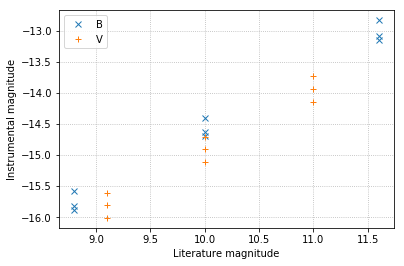

In [5]:
data_std = table.join(data, std, keys='Target')
# Joins two tables, data and std, based on the column 'Target'.
# Columns with name 'obj1' and 'obj2' does not exist in table std,
# so those rows will be deleted.
data_std.pprint(max_width=200)

print('Plot of literature VS instrumental magnitudes')
from matplotlib import pyplot as plt
plt.plot(data_std['B'], data_std['b'], marker='x', mfc='b', ls='', label='B')
plt.plot(data_std['V'], data_std['v'], marker='+', mfc='r', ls='', label='V')
plt.xlabel('Literature magnitude')
plt.ylabel('Instrumental magnitude')
plt.grid(ls=':')
plt.legend()
plt.show()

결과를 보면 literature magnitude와 instrumental magnitude 는 약 25 정도 차이가 나는데, linear relationship이 매우 좋다. instrumental magnitude를 literature magnitude 와 일치키시는 과정이 바로 standardization 이다.

## Example 3: Parameters for Standardization

아제 다음 formula를 적용해 보자.

\begin{align}
	v - V &=  z_{V} + k_{V} X \quad( + {\rm color~correction~terms})~,\\
    b - B &=  z_{B} + k_{B} X \quad( + {\rm color~correction~terms})~,
\end{align}

$v, ~b$는 instrumental magnitudes 이고, $V, ~B$는 standard stars의 literature magnitudes 이다.

> ** How do we obtain the zero point ($z$) and the extinction coefficient ($k$)?**


답은 매우 간단하다. ($v - V$) and ($b-B$) versus $X$ 그래프를 그려보는 것이다. 

I will use line fitting module from `scipy.optimize.curve_fit`, but you can also use `numpy.polyfit` or just make your own package to use. 

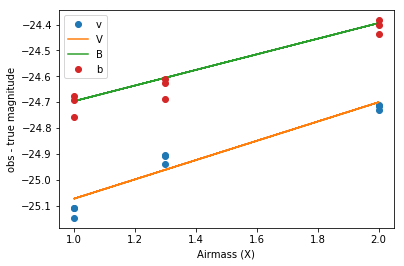

B: z_B & k_B = [-24.99762076   0.30163876]
V: z_V & k_V = [-25.44562147   0.37269281]


In [6]:
from scipy.optimize import curve_fit

# Define a function that will be used for fitting.
# Except for x, other two parameters (zero and k) should have 'default' value
# to be used in scipy.optimize.curve_fit.
def fitting(x, zero=0, k=1):
    return zero + k*x

vV = data_std['v'] - data_std['V']
bB = data_std['b'] - data_std['B']

# curve_fit gives two outputs: fitted parameters & covariance matrix
# The covariance matrix can be used for parameter error analysis and correlation check.
fitted_V = curve_fit(fitting, data_std['X'], vV, sigma=data_std['dv'])
fitted_B = curve_fit(fitting, data_std['X'], bB, sigma=data_std['db'])
fitpar_V = fitted_V[0] # contains z_V and k_V
fitpar_B = fitted_B[0] # contains z_B and k_B

# In Python, *something means you "unzip" the variable named "something".
# If something=[1, 2, 3], '*something' is identical to type '1, 2, 3'.
plt.plot(data_std['X'], vV, 'o')
plt.plot(data_std['X'], fitting(data_std['X'], *fitpar_V), label='V')
plt.plot(data_std['X'], fitting(data_std['X'], *fitpar_B), label='B')
plt.plot(data_std['X'], bB, 'o')
plt.xlabel('Airmass (X)')
plt.ylabel('obs - true magnitude')
plt.legend()
plt.show()
print('B: z_B & k_B =',fitpar_B)
print('V: z_V & k_V =',fitpar_V)

## Example 4: Standardization with One More Color Term

우리는 section 2.2의 color terms를 무시했지만 더 정확한 결과를 얻고 싶다면 $ k_ {XC} $ term 을 무시하고 $ a $ term 을 포함하여 다음과 같이 구해볼 수 있다.

\begin{align}
	z_V' &= v - V - z_V \\
        &= k_V X + a_V({\rm B}-{\rm V}) \\
    z_B' &= b - v - z_C \\
        &= k_C X + a_C({\rm B}-{\rm V}) ~.
\end{align}

아래첨자 $C$ 는 color를 의미한다. 

In [7]:
def fitting2(INPUT, zero=0, k=1, a=1):
    X     = INPUT['X']
    COLOR = INPUT['COLOR']
    return zero + k*X + a*COLOR

vV = data_std['v'] - data_std['V']
bv = data_std['color']

fitted_vV = curve_fit(fitting2, data_std['X','COLOR'], vV)
fitpar_vV = fitted_vV[0]
fitted_bv = curve_fit(fitting2, data_std['X','COLOR'], bv)
fitpar_bv = fitted_bv[0]
print('v-V: z_V , k_V , a_V =',fitpar_vV)
print('b-v: z_C , k_C , a_C =',fitpar_bv)

v-V: z_V , k_V , a_V = [-25.4652505    0.38337417  -0.03535229]
b-v: z_C , k_C , a_C = [ 0.44555979 -0.07489208  0.95596985]
